# Testing the 1 hidden layer NN on the [banknote authentication Data Set](http://archive.ics.uci.edu/ml/datasets/banknote+authentication)

First Let's import some packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

I previously dowloaded the dataset. Let's now load it

In [2]:
data = np.genfromtxt('data_banknote_authentication.txt', delimiter = ',')
X = data[:,:4]
y = data[:, 4]

The dataset contains 1372 examples, each of them described vy 4 features

In [3]:
X.shape

(1372, 4)

In [4]:
y.shape

(1372,)

The features/labels correspond to:

    * variance of Wavelet Transformed image (continuous)    
    * skewness of Wavelet Transformed image (continuous)
    * curtosis of Wavelet Transformed image (continuous)
    * entropy of image (continuous) 
    
A quick look at the data tell us that it can be classified:

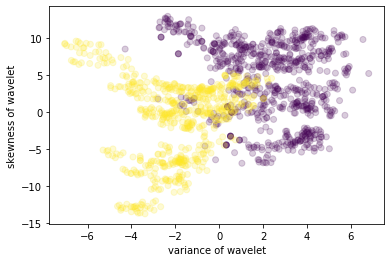

In [5]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2,
 c=y, cmap='viridis')
plt.xlabel('variance of wavelet')
plt.ylabel('skewness of wavelet');

Data normalization:

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

Split into train and test sets:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

We can now create an instance of the OneHiddenLayerNN with 4 neurons in the hidden layer:

In [8]:
from OneHiddenLayerNN import *
myModel = OneHiddenLayerNN(4)

and train it:

In [9]:
# 4000 iterations
# learning rate = 0.01
myModel.train(X_train, y_train, True, 4000, 0.01)

Cost after iteration 0: 0.693149
Cost after iteration 100: 0.691194
Cost after iteration 200: 0.689935
Cost after iteration 300: 0.688993
Cost after iteration 400: 0.688009
Cost after iteration 500: 0.686469
Cost after iteration 600: 0.683421
Cost after iteration 700: 0.677009
Cost after iteration 800: 0.663987
Cost after iteration 900: 0.640111
Cost after iteration 1000: 0.602688
Cost after iteration 1100: 0.553677
Cost after iteration 1200: 0.498889
Cost after iteration 1300: 0.444029
Cost after iteration 1400: 0.392465
Cost after iteration 1500: 0.345614
Cost after iteration 1600: 0.303955
Cost after iteration 1700: 0.267579
Cost after iteration 1800: 0.236341
Cost after iteration 1900: 0.209879
Cost after iteration 2000: 0.187671
Cost after iteration 2100: 0.169116
Cost after iteration 2200: 0.153615
Cost after iteration 2300: 0.140623
Cost after iteration 2400: 0.129674
Cost after iteration 2500: 0.120385
Cost after iteration 2600: 0.112443
Cost after iteration 2700: 0.105602
Cost

We can now plot the cost during training

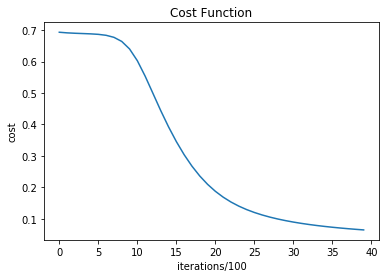

In [10]:
myModel.plotCosts()

and evaluate the accuracy of the trined model on the test set

In [11]:
myModel.scoring(myModel.predict(X_test),y_test)

0.9757281553398058

Almost 98%. We can also plot the confusion matrix